# This notebook is supposed to be a baseline functioning example of a very simple genetic algorithm. Don't fuck with it and break it.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def calculate_fitness(driver):
    return np.sum(driver)

In [3]:
def calculate_fitness_array(drivers):
    fitnesses = [calculate_fitness(driver) for driver in drivers]
    return fitnesses - np.min(fitnesses)

In [4]:
def mutate_array(drivers, num_mutations):
    mutated_genes = np.random.randint(0,2, size=(drivers.shape[0], num_mutations))
    mutation_locations = np.random.randint(0, drivers.shape[1], size=(drivers.shape[0], num_mutations))
    mutated_drivers = np.copy(drivers)
    for i, driver in enumerate(mutated_drivers):
        driver[mutation_locations[i]] = mutated_genes[i]
    return mutated_drivers

In [5]:
def merge_genes(a, b, n_genes):
    merged = np.zeros(shape=(n_genes, int(a.shape[0]/n_genes)))
    
    genes_a = a.reshape(n_genes, int(a.shape[0]/n_genes))
    genes_b = b.reshape(n_genes, int(b.shape[0]/n_genes))
    to_merge = np.random.randint(0,2, size=(n_genes))

    merged[to_merge == 0] = genes_a[to_merge == 0]
    merged[to_merge == 1] = genes_b[to_merge == 1]
    
    return merged.reshape(-1)

In [6]:
def genes_to_rgb(agent):
    RGB_driver = agent.reshape(8, 3, int(agent.shape[0]/24))
    image_pixels = np.zeros(shape=(1, int(agent.shape[0]/24), 3))
    for i, pixel in enumerate(RGB_driver):
        for j, channel in enumerate(pixel):
            image_pixels[0][i][j] = channel.dot(2**np.arange(channel.size)[::-1])
    return image_pixels.astype(int)

In [7]:
def show_n_agents(agents, n):
    img = []
    indices = np.random.randint(0,agents.shape[0], size=(n))
    for index in indices:
        rgb_agent = genes_to_rgb(agents[index])
        img.append(rgb_agent[0])
    plt.imshow(np.array(img))
    plt.axis('off');

In [8]:
num_genes = 192 #Representable as 8 pixels of 255 RGB
num_drivers = 50
num_generations = 250
n_mutations = 1

In [9]:
current_generation = np.random.randint(0,2, size=(num_drivers, num_genes))
first_generation = np.copy(current_generation)
history = []

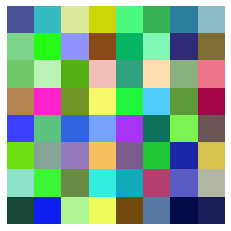

In [10]:
show_n_agents(current_generation, 8)

In [11]:
for i in range(num_generations):
    fitnesses = calculate_fitness_array(current_generation)
    gene_pool = np.array(random.choices(current_generation, weights = fitnesses, k=current_generation.shape[0]*2))

    next_generation = np.array([merge_genes(gene_pool[i], gene_pool[i+1], 24) for i in range(int(len(gene_pool)/2))])
    next_generation = mutate_array(next_generation, n_mutations)
                                   
    current_generation = next_generation
   
    history.append(np.mean(current_generation))
    if(i % 1000 == 0):
            print(np.mean(current_generation))

0.5240625


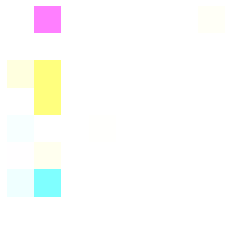

In [12]:
show_n_agents(current_generation, 8)

0.5126041666666666

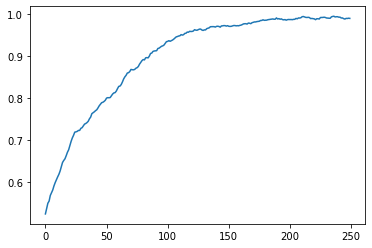

In [13]:
plt.plot(np.arange(0, len(history)), history);
np.mean(first_generation.sum(axis=1)/num_genes)